F1 Score (Random Forest): 0.9523809523809523


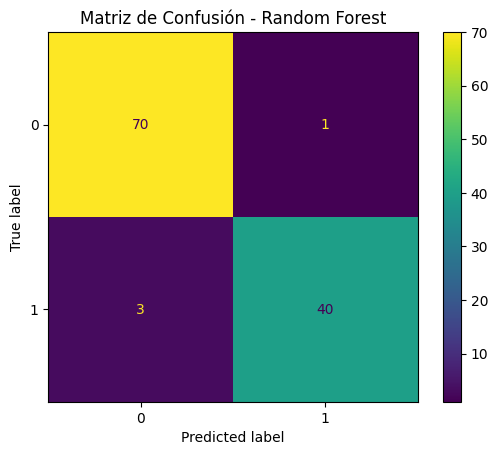

F1 Score (SVM): 0.9647058823529412


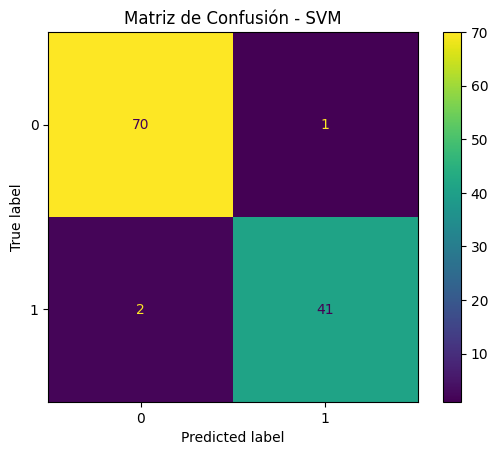


Resumen de Resultados:
Random Forest - F1 Score: 0.9524
SVM - F1 Score: 0.9647

SVM tuvo mejor desempeño en este conjunto de datos.


In [29]:
# MedAnalytica - Clasificación de Cáncer de Mama

# 1. Importación de librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

import kagglehub

# 2. Carga del dataset
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")
df = pd.read_csv(f"{path}/data.csv")

# 3. Limpieza de datos
# Eliminar columnas irrelevantes
df.drop(columns=['id', 'Unnamed: 32'], inplace=True, errors='ignore')

# Codificación de la variable objetivo
df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])  # M=1, B=0

# 4. Separación de variables
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# 5. Escalado de variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. División del dataset
datos_entrenamiento, datos_prueba, etiquetas_entrenamiento, etiquetas_prueba = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 7. Modelo 1: Random Forest
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(datos_entrenamiento, etiquetas_entrenamiento)
predicciones_rf = modelo_rf.predict(datos_prueba)
f1_rf = f1_score(etiquetas_prueba, predicciones_rf)
print("F1 Score (Random Forest):", f1_rf)
cm_rf = confusion_matrix(etiquetas_prueba, predicciones_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=modelo_rf.classes_)
disp_rf.plot()
plt.title("Matriz de Confusión - Random Forest")
plt.show()

# 8. Modelo 2: SVM
modelo_svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
modelo_svm.fit(datos_entrenamiento, etiquetas_entrenamiento)
predicciones_svm = modelo_svm.predict(datos_prueba)
f1_svm = f1_score(etiquetas_prueba, predicciones_svm)
print("F1 Score (SVM):", f1_svm)
cm_svm = confusion_matrix(etiquetas_prueba, predicciones_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=modelo_svm.classes_)
disp_svm.plot()
plt.title("Matriz de Confusión - SVM")
plt.show()

# 9. Comparación
print("\nResumen de Resultados:")
print(f"Random Forest - F1 Score: {f1_rf:.4f}")
print(f"SVM - F1 Score: {f1_svm:.4f}")
if f1_svm > f1_rf:
    print("\nSVM tuvo mejor desempeño en este conjunto de datos.")
else:
    print("\nRandom Forest tuvo mejor desempeño en este conjunto de datos.")
